# The extended SIRD Model

In [1]:
using Distributions
using Plots
using PlutoUI

Here we consider the extended SIRD model with transistions 
* $S\overset{\alpha}{\to} I$ (susceptible person becomes infected)
* $I\overset{\beta}{\to} R$ (infected person recovers)
* $I\overset{\mu}{\to} D$ (infected person deceases)
* $R\overset{\rho}{\to} S$ (recovered person becomes suscpetible again)
* $\{S,I,R\}\overset{\lambda}{\to} \{S,I,R\}+S$ (susceptible person reproduces)

Note that the transition *probabilities* are dependent on the current population size, namely

* $p_{S\to I}={\Omega}\alpha\cdot N_S\cdot N_I$
* $p_{I\to R}={\Omega}\beta\cdot N_I$
* $p_{I\to D}={\Omega}\mu\cdot N_I$
* $p_{R\to S}={\Omega}\rho\cdot N_R$
* $p_{\{S,I,R\}\to \{S,I,R\}+S}=\frac{1}{\Omega}\alpha\cdot (N_S+N_I+N_R)$

where $\Omega=\sum p$

In [6]:
α=0.01
β=0.4
μ=0.0
ρ=0.0
λ=0.0

0.0

In [7]:
N_s = [1000.]
N_i = [10.]
N_r = [0.]
N_d = [0.]
elapsed = [0.]
for i in 1:20000
	w_1 = α*N_s[i]*N_i[i]
	w_2 = β*N_i[i]
	w_3 = μ*N_i[i]
	w_4 = ρ*N_r[i]
    w_5 = λ*(N_r[i]+N_i[i]+N_s[i])
    Ω=w_1+w_2+w_3+w_4+w_5
	τ=1/Ω
	ξ₁,ξ₂ = rand(2)
	δt = -τ*log(ξ₁)
	
	if ξ₁ < w_1/Ω
		append!(N_s, N_s[i]-1)
		append!(N_i, N_i[i]+1)
		append!(N_r, N_r[i])
		append!(N_d, N_d[i])
	elseif ξ₁ < (w_1+w_2)/Ω
		append!(N_s, N_s[i])
		append!(N_i, N_i[i]-1)
		append!(N_r, N_r[i]+1)
		append!(N_d, N_d[i])
	elseif ξ₁ < (w_1+w_2+w_3)/Ω
		append!(N_s, N_s[i])
		append!(N_i, N_i[i]-1)
		append!(N_r, N_r[i])
		append!(N_d, N_d[i]+1)
	elseif ξ₁ < (w_1+w_2+w_3+w_4)/Ω
		append!(N_s, N_s[i]+1)
		append!(N_i, N_i[i])
		append!(N_r, N_r[i]-1)
		append!(N_d, N_d[i])
	else
		append!(N_s, N_s[i]+1)
		append!(N_i, N_i[i])
		append!(N_r, N_r[i])
		append!(N_d, N_d[i])
	end
	append!(elapsed, elapsed[i]+δt)
end

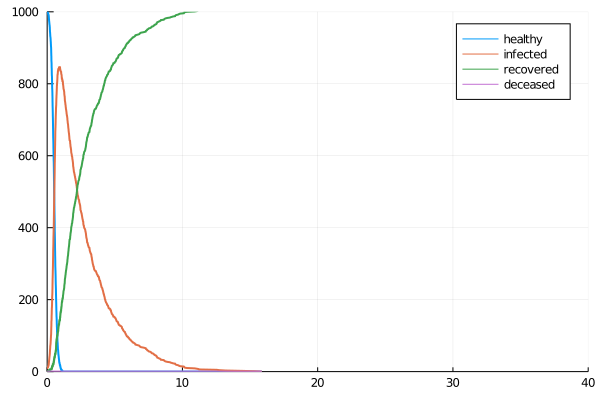

In [8]:
plot(elapsed, N_s, label="healthy", lw=2)
plot!(elapsed, N_i, label="infected", lw=2)
plot!(elapsed, N_r, label="recovered", lw=2)
plot!(elapsed, N_d, label="deceased", lw=2)
ylims!(0,1000)
xlims!(0,40)